In [ ]:
#Install modules
!pip install pandas
!pip install matplotlib
!pip install wordcloud
!pip install jieba 
!pip install scipy

In [7]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from PIL import Image
import wordcloud
import numpy as np

path = '/Library/Fonts/SimHei.ttf'
prop = mpl.font_manager.FontProperties(fname=path)
mpl.rcParams['font.family'] = prop.get_name()

Text(0.5,1,'測試')

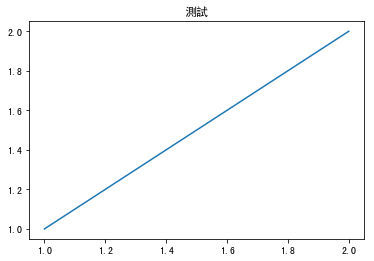

In [8]:
plt.plot([1, 2], [1, 2])
plt.title('測試')

Text(0.5,1,'測試')

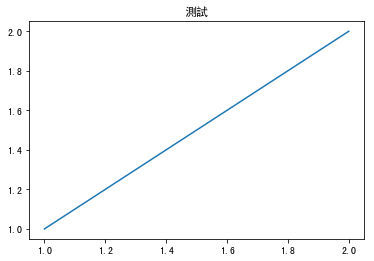

In [9]:
plt.plot([1, 2], [1, 2])
plt.title('測試')

In [10]:
# Read specific column of a dataset
import csv
text_for_wordcloud=[]     #an empty list to store the second column
with open('Weibo米兔.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        text_for_wordcloud.append(row[2])
text_for_wordcloud = "".join(text_for_wordcloud[1:])    #exclude the title for this column and combine elements

#Remove all punctuations
import re
punctuation='[\s+\.\!\/_,$%^*(+\"\')]+|[+——()?:【】“”‘’！，。？、~@#￥%……&*（）《》·：；『』]+'
text_for_wordcloud = re.sub(punctuation,' ',text_for_wordcloud).replace(" ","")
text_for_wordcloud

#Segment the whole text into words via jieba
import jieba
segment_text_for_wordcloud = list(jieba.cut(text_for_wordcloud,cut_all = False))

#Handle the stop words
#Source of the stop words list: https://blog.csdn.net/duck_genuine/article/details/5831499
#I also added some stop words according to the content of the text
stop_words = ["因为","不是","把","为","可以","什么","而","但是","就是","还是","但","又","觉得","这个","多","更","中","与","全文","对","让","他","还","的","了", "在", "是", "我", "有", "和", "就", "不", "人", "都", "一", "一个", "上", "也", "很", "到", "说", "要", "去", "你", "会", "着", "没有", "看", "好", "自己", "这" ]
def remove_stop_words(segment_text_for_wordcloud, stop_words):
    words_list = []
    for w in segment_text_for_wordcloud:
        if w not in stop_words:
            words_list.append(w)
    return words_list

processed_word_list = remove_stop_words(segment_text_for_wordcloud, stop_words)

In [13]:
processed_word_list

['感谢',
 '老师',
 '同时',
 '同事',
 '金兼斌',
 '教授',
 '做',
 '专访',
 '米',
 '兔',
 '运动',
 '介入',
 '式',
 '文化',
 '研究',
 '知识分子',
 '社会',
 '责任',
 '算是',
 '给',
 '今年夏天',
 '我们',
 '共同',
 '经历',
 '一切',
 '留下',
 '一些',
 '记录',
 '吧',
 'Illbeyourvoice',
 '美国',
 '米',
 '兔',
 '运动',
 '新进展',
 '今年',
 '7',
 '月',
 '纽约',
 '客',
 '发表',
 'RonanFarrow',
 '撰写',
 '报道',
 '披露',
 '六名',
 '女性',
 '指控',
 'CBS',
 '总裁兼',
 'CEOLesMoonves',
 '性骚扰',
 '周日',
 '9',
 '月',
 '9',
 '日',
 '早上',
 'RonanFarrow',
 '纽约',
 '客',
 '再次',
 '发布',
 '跟进',
 '报道',
 '披露',
 '另外',
 '六名',
 '女性',
 '指控',
 '几小时',
 '后',
 'CBS',
 '宣布',
 'LesMoonves',
 '即刻',
 '下台',
 'CBS',
 '以及',
 'LesMoonves',
 '本人',
 '将',
 '向',
 '米',
 '兔',
 '米',
 '兔',
 '运动',
 '与其',
 '站',
 '传统',
 '文化',
 '女性',
 '立场',
 '比如',
 '女',
 '德',
 '所谓',
 '单纯',
 '善良',
 '自尊心',
 '等',
 '不如',
 '借此机会',
 '来',
 '捍卫',
 '女性',
 '独立思想',
 '重要性',
 '面对',
 '熟人',
 '侵犯',
 '时',
 '坚决',
 '性',
 '跟',
 '完美',
 '受害者',
 '任何',
 '关系',
 '没',
 '要求',
 '必须',
 '完美',
 '希望',
 '妇女儿童',
 '们',
 '明白',
 '这些',
 '社会交往',
 '能力',
 '这样',
 '社会',
 '长大',
 '可能',
 '一无所知',

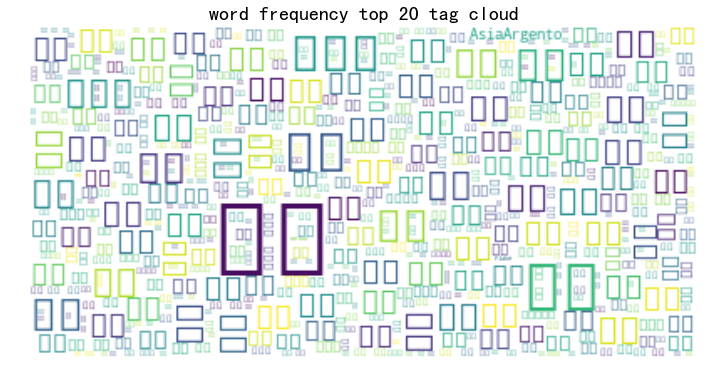

In [14]:
wc = wordcloud.WordCloud(background_color="white",max_words=3000,max_font_size=60, random_state=40)
wc.generate_from_text(' '.join(processed_word_list))
#     plt.rcParams['font.sans-serif']=['SimHei']
#     plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('word frequency top 20 tag cloud', loc='Center', fontsize=20)
plt.show()

In [11]:
#Rank the keywords from higher frequency to lower frequency
import os
import pandas as pd
word_count = pd.Series(processed_word_list).value_counts().sort_values(ascending=False)[0:15]

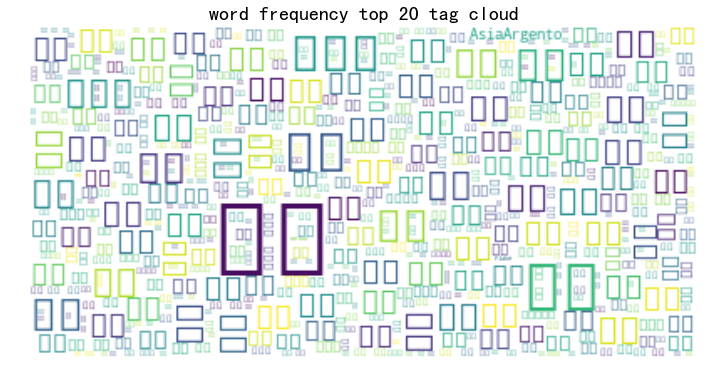

In [12]:
def tag_cloud(text):
    wc = wordcloud.WordCloud(background_color="white",max_words=3000,max_font_size=60, random_state=40)
    wc.generate_from_text(' '.join(text))
#     plt.rcParams['font.sans-serif']=['SimHei']
#     plt.rcParams['axes.unicode_minus']=False
    plt.figure(figsize=(12,12))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('word frequency top 20 tag cloud', loc='Center', fontsize=20)
    plt.show()
    return plt.show()

tag_cloud(processed_word_list)

In [1]:
!open /Users/limengyu/Documents/Tool/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc

In [2]:
import matplotlib as mpl
mpl.get_cachedir()

'/Users/limengyu/.matplotlib'

In [3]:
!open /Users/limengyu/.matplotlib